In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:

#import dataset from csv file
df = pd.read_csv('Indonesia_Consumption.csv')
df.head()

iso_code    country  year  coal_prod_change_pct  coal_prod_change_twh  \
0      IDN  Indonesia  1900                   NaN                   NaN   
1      IDN  Indonesia  1901                 0.985                 0.016   
2      IDN  Indonesia  1902                -6.341                -0.106   
3      IDN  Indonesia  1903                 9.896                 0.155   
4      IDN  Indonesia  1904                 9.479                 0.163   

   gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                  NaN                  NaN                  NaN   
1                  NaN                  0.0               78.135   
2                  NaN                  0.0              -39.350   
3                  NaN                  0.0              136.905   
4                  NaN                  0.0               12.814   

   oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
0                  NaN                     NaN  ...                    NaN   
1                2.826                     NaN  ...                    NaN   
2               -2.535                     NaN  ...                    NaN   
3                5.350                     NaN  ...                    NaN   
4                1.186                     NaN  ...                    NaN   

   solar_energy_per_capita           gdp  wind_share_elec  \
0                      NaN  4.852760e+10              NaN   
1                      NaN  4.780818e+10              NaN   
2                      NaN  4.679696e+10              NaN   
3                      NaN  4.943822e+10              NaN   
4                      NaN  5.001521e+10              NaN   

   wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
0                   NaN                NaN                   NaN   
1                   NaN                NaN                   NaN   
2                   NaN                NaN                   NaN   
3                   NaN                NaN                   NaN   
4                   NaN                NaN                   NaN   

   wind_consumption  wind_elec_per_capita  wind_energy_per_capita  
0               NaN                   NaN                     NaN  
1               NaN                   NaN                     NaN  
2               NaN                   NaN                     NaN  
3               NaN                   NaN                     NaN  
4               NaN                   NaN                     NaN  

[5 rows x 122 columns]

In [3]:
# checking missing value
df.isnull().sum()

iso_code                   0
country                    0
year                       0
coal_prod_change_pct       5
coal_prod_change_twh      18
                          ..
wind_share_energy         65
wind_cons_change_twh      66
wind_consumption          65
wind_elec_per_capita      85
wind_energy_per_capita    65
Length: 122, dtype: int64

In [4]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(118), int64(2), object(2)
memory usage: 114.5+ KB


In [6]:
df.dtypes

iso_code                   object
country                    object
year                        int64
coal_prod_change_pct      float64
coal_prod_change_twh      float64
                           ...   
wind_share_energy         float64
wind_cons_change_twh      float64
wind_consumption          float64
wind_elec_per_capita      float64
wind_energy_per_capita    float64
Length: 122, dtype: object

In [7]:
def plot_boxplots_for_int_columns(df):
    # Gets names of all columns with data type int
    name_int = df.select_dtypes(include='int').columns.tolist()
    # Subplots
    num_cols = len(name_int)
    num_rows = (num_cols + 2) // 3

    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
    axs = axs.flatten()

    # Boxplot for each integer variable
    for i, var in enumerate(name_int):
        sns.boxplot(x=df[var], ax=axs[i])
        axs[i].set_title(var)

    # Remove any extra empty subplot if needed
    if num_cols < len(axs):
        for i in range(num_cols, len(axs)):
            fig.delaxes(axs[i])

    # Adjust spacing between subplots
    fig.tight_layout()

    plt.show()

# Contoh penggunaan
#plot_boxplots_for_int_columns(df2)

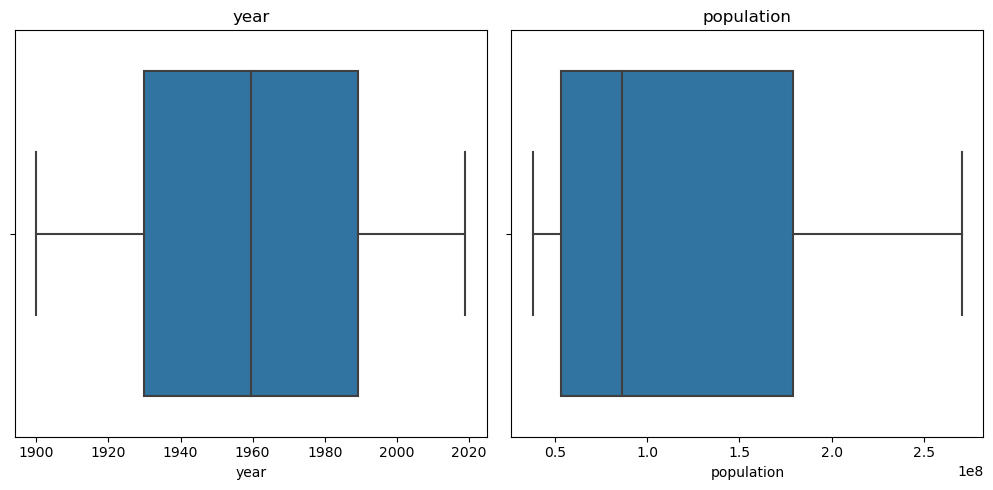

In [8]:
plot_boxplots_for_int_columns(df)

In [9]:
def plot_boxplots_for_int_columns(df):
    # Gets names of all columns with data type int
    name_float = df.select_dtypes(include='float').columns.tolist()
    # Subplots
    num_cols = len(name_float)
    num_rows = (num_cols + 2) // 3

    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
    axs = axs.flatten()

    # Boxplot for each integer variable
    for i, var in enumerate(name_float):
        sns.boxplot(x=df[var], ax=axs[i])
        axs[i].set_title(var)

    # Remove any extra empty subplot if needed
    if num_cols < len(axs):
        for i in range(num_cols, len(axs)):
            fig.delaxes(axs[i])

    # Adjust spacing between subplots
    fig.tight_layout()

    plt.show()

# Contoh penggunaan
#plot_boxplots_for_int_columns(df2)

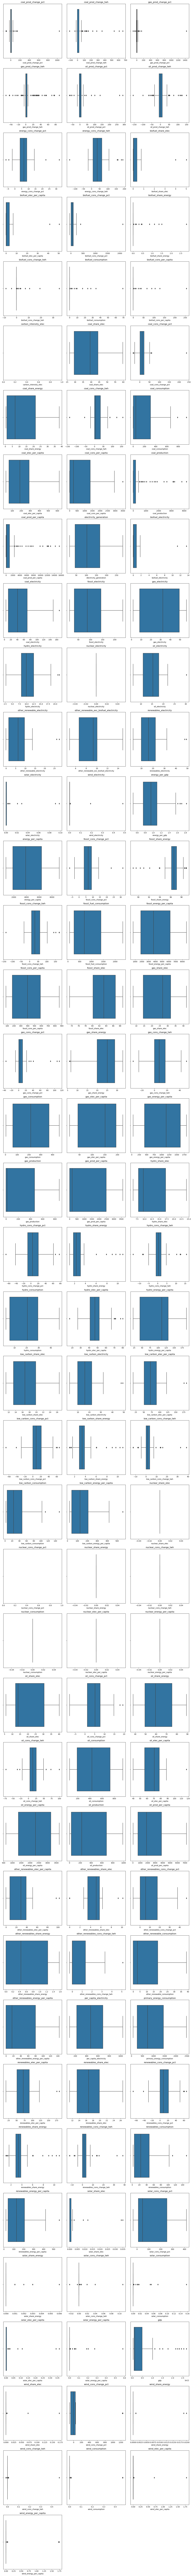

In [10]:
plot_boxplots_for_int_columns(df)

<function matplotlib.pyplot.show(close=None, block=None)>

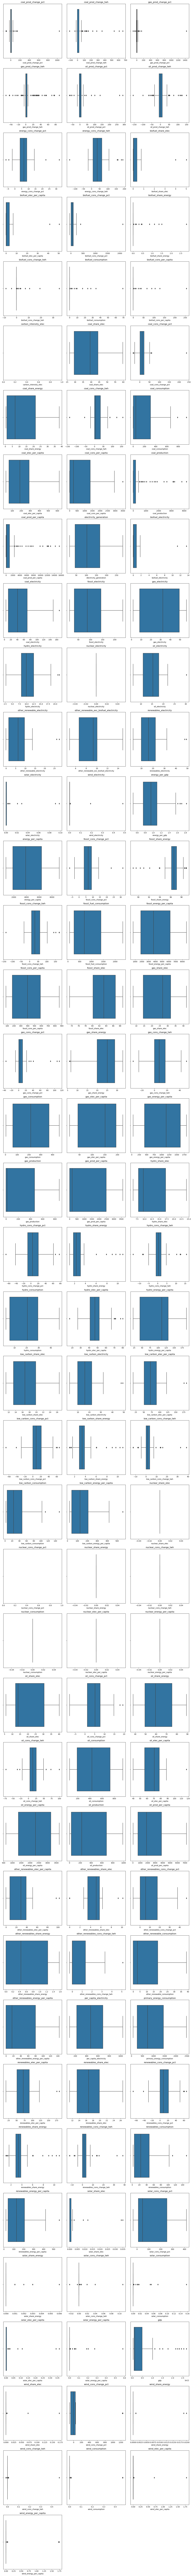

In [12]:
# gets names of all columns with data type int
name_float2 = df.select_dtypes(include='float').columns.tolist()
# sub plots
num_cols = len(name_float2)
# to make sure there are enough rows for the subplots
num_rows = (num_cols+2)//3 
fig, axs = plt.subplots(nrows=num_rows, ncols =3, figsize=(15,5*num_rows))
axs = axs.flatten()
# Countplot for each integer variable
for i, var in enumerate(name_float2):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

#Remove any extra emply subplot if needed
if num_cols < len(axs): 
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
#adjust spacing between sub plots
fig.tight_layout()

plt.show

In [39]:
df_copy = df.copy()
nilai_maksimum_kolom = df_copy.max()

print("Nilai maksimum untuk setiap kolom:")
print(nilai_maksimum_kolom)

Nilai maksimum untuk setiap kolom:
iso_code                        IDN
country                   Indonesia
year                           2019
coal_prod_change_pct       1043.396
coal_prod_change_twh        661.494
                            ...    
wind_share_energy              0.02
wind_cons_change_twh          0.467
wind_consumption              0.467
wind_elec_per_capita          1.788
wind_energy_per_capita        1.745
Length: 122, dtype: object


In [40]:
# Mendapatkan nilai tertinggi dan indeksnya
nilai_tertinggi = df['coal_prod_change_pct'].max()
indeks_nilai_tertinggi = df['coal_prod_change_pct'].idxmax()

print("Nilai tertinggi:", nilai_tertinggi)
print("Indeks data tertinggi:", indeks_nilai_tertinggi)

Nilai tertinggi: 1043.396
Indeks data tertinggi: 21


In [58]:
# Mendapatkan nilai tertinggi dan indeksnya dari salinan DataFrame
kolom_terpilih = ['coal_prod_change_pct', 'gas_prod_change_pct', 'oil_prod_change_pct']

nilai_tertinggi = df_copy[kolom_terpilih].max()
indeks_nilai_tertinggi = df_copy[kolom_terpilih].idxmax()

print("Nilai tertinggi:")
print(nilai_tertinggi)
print("\nIndeks data tertinggi:")
print(indeks_nilai_tertinggi)

Nilai tertinggi:
coal_prod_change_pct    1043.396
gas_prod_change_pct     1437.500
oil_prod_change_pct      290.566
dtype: float64

Indeks data tertinggi:
coal_prod_change_pct    21
gas_prod_change_pct     48
oil_prod_change_pct     48
dtype: int64


In [59]:
# Menghapus baris dengan nilai tertinggi dari salinan DataFrame
df_cleaned= df_copy.drop(index=indeks_nilai_tertinggi).reset_index(drop=True)

#print("\nDataFrame salinan setelah menghapus nilai tertinggi:")
#print(df_copy_tertinggi_diambil)

# Tampilkan DataFrame asli untuk memastikan bahwa tidak berubah
#print("\nDataFrame asli:")
#print(df)

In [44]:
df_cleaned.head()

iso_code    country  year  coal_prod_change_pct  coal_prod_change_twh  \
0      IDN  Indonesia  1900                   NaN                   NaN   
1      IDN  Indonesia  1901                 0.985                 0.016   
2      IDN  Indonesia  1902                -6.341                -0.106   
3      IDN  Indonesia  1903                 9.896                 0.155   
4      IDN  Indonesia  1904                 9.479                 0.163   

   gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                  NaN                  NaN                  NaN   
1                  NaN                  0.0               78.135   
2                  NaN                  0.0              -39.350   
3                  NaN                  0.0              136.905   
4                  NaN                  0.0               12.814   

   oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
0                  NaN                     NaN  ...                    NaN   
1                2.826                     NaN  ...                    NaN   
2               -2.535                     NaN  ...                    NaN   
3                5.350                     NaN  ...                    NaN   
4                1.186                     NaN  ...                    NaN   

   solar_energy_per_capita           gdp  wind_share_elec  \
0                      NaN  4.852760e+10              NaN   
1                      NaN  4.780818e+10              NaN   
2                      NaN  4.679696e+10              NaN   
3                      NaN  4.943822e+10              NaN   
4                      NaN  5.001521e+10              NaN   

   wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
0                   NaN                NaN                   NaN   
1                   NaN                NaN                   NaN   
2                   NaN                NaN                   NaN   
3                   NaN                NaN                   NaN   
4                   NaN                NaN                   NaN   

   wind_consumption  wind_elec_per_capita  wind_energy_per_capita  
0               NaN                   NaN                     NaN  
1               NaN                   NaN                     NaN  
2               NaN                   NaN                     NaN  
3               NaN                   NaN                     NaN  
4               NaN                   NaN                     NaN  

[5 rows x 122 columns]

In [78]:
kolom_dataframe_cleaned_list = df_cleaned.columns.tolist()
kolom_dataframe_cleaned_list

['iso_code',
 'country',
 'year',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'gas_prod_change_pct',
 'gas_prod_change_twh',
 'oil_prod_change_pct',
 'oil_prod_change_twh',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'biofuel_share_elec',
 'biofuel_elec_per_capita',
 'biofuel_cons_change_pct',
 'biofuel_share_energy',
 'biofuel_cons_change_twh',
 'biofuel_consumption',
 'biofuel_cons_per_capita',
 'carbon_intensity_elec',
 'coal_share_elec',
 'coal_cons_change_pct',
 'coal_share_energy',
 'coal_cons_change_twh',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_cons_per_capita',
 'coal_production',
 'coal_prod_per_capita',
 'electricity_generation',
 'biofuel_electricity',
 'coal_electricity',
 'fossil_electricity',
 'gas_electricity',
 'hydro_electricity',
 'nuclear_electricity',
 'oil_electricity',
 'other_renewable_electricity',
 'other_renewable_exc_biofuel_electricity',
 'renewables_electricity',
 'solar_electricity',
 'wind_electricity',
 'energy_per_gdp',
 '

In [89]:
persentase = ['coal_prod_change_pct', 
              'gas_prod_change_pct', 
              'oil_prod_change_pct','energy_cons_change_pct',
             'biofuel_cons_change_pct', 'coal_cons_change_pct',
            'fossil_cons_change_pct',
             'gas_cons_change_pct','hydro_cons_change_pct',
             'low_carbon_cons_change_pct', 'other_renewables_cons_change_pct',
             'renewables_cons_change_pct', 'solar_cons_change_pct',
             'wind_cons_change_pct']

persentase_df = df[persentase]
persentase_df

coal_prod_change_pct  gas_prod_change_pct  oil_prod_change_pct  \
0                     NaN                  NaN                  NaN   
1                   0.985                  NaN               78.135   
2                  -6.341                  NaN              -39.350   
3                   9.896                  NaN              136.905   
4                   9.479                  NaN               12.814   
..                    ...                  ...                  ...   
115                 0.757               -0.311               -0.938   
116                -1.163               -1.421                5.388   
117                 1.107               -3.163               -4.204   
118                20.927                0.133               -3.526   
119                 9.363               -7.224               -3.403   

     energy_cons_change_pct  biofuel_cons_change_pct  coal_cons_change_pct  \
0                       NaN                      NaN                   NaN   
1                       NaN                      NaN                   NaN   
2                       NaN                      NaN                   NaN   
3                       NaN                      NaN                   NaN   
4                       NaN                      NaN                   NaN   
..                      ...                      ...                   ...   
115                   0.159                  -50.407                13.378   
116                   2.769                  228.743                 4.303   
117                   3.737                  -14.495                 7.156   
118                   8.624                   45.607                18.602   
119                   8.339                  101.993                20.000   

     fossil_cons_change_pct  gas_cons_change_pct  hydro_cons_change_pct  \
0                       NaN                  NaN                    NaN   
1                       NaN                  NaN                    NaN   
2                       NaN                  NaN                    NaN   
3                       NaN                  NaN                    NaN   
4                       NaN                  NaN                    NaN   
..                      ...                  ...                    ...   
115                   0.810                3.891                 -9.910   
116                   1.142               -2.458                 35.121   
117                   3.897               -3.171                 -0.825   
118                   8.593                3.039                -10.216   
119                   7.000               -1.597                  0.609   

     low_carbon_cons_change_pct  other_renewables_cons_change_pct  \
0                           NaN                               NaN   
1                           NaN                               NaN   
2                           NaN                               NaN   
3                           NaN                               NaN   
4                           NaN                               NaN   
..                          ...                               ...   
115                     -14.941                             0.663   
116                      47.567                             5.818   
117                       0.724                            18.549   
118                       9.216                             9.387   
119                      34.246                             8.876   

     renewables_cons_change_pct  solar_cons_change_pct  wind_cons_change_pct  
0                           NaN                    NaN                   NaN  
1                           NaN                    NaN                   NaN  
2                           NaN                    NaN                   NaN  
3                           NaN                    NaN                   NaN  
4                           NaN                    NaN                   NaN  
..         

In [93]:
x_column = 'year'

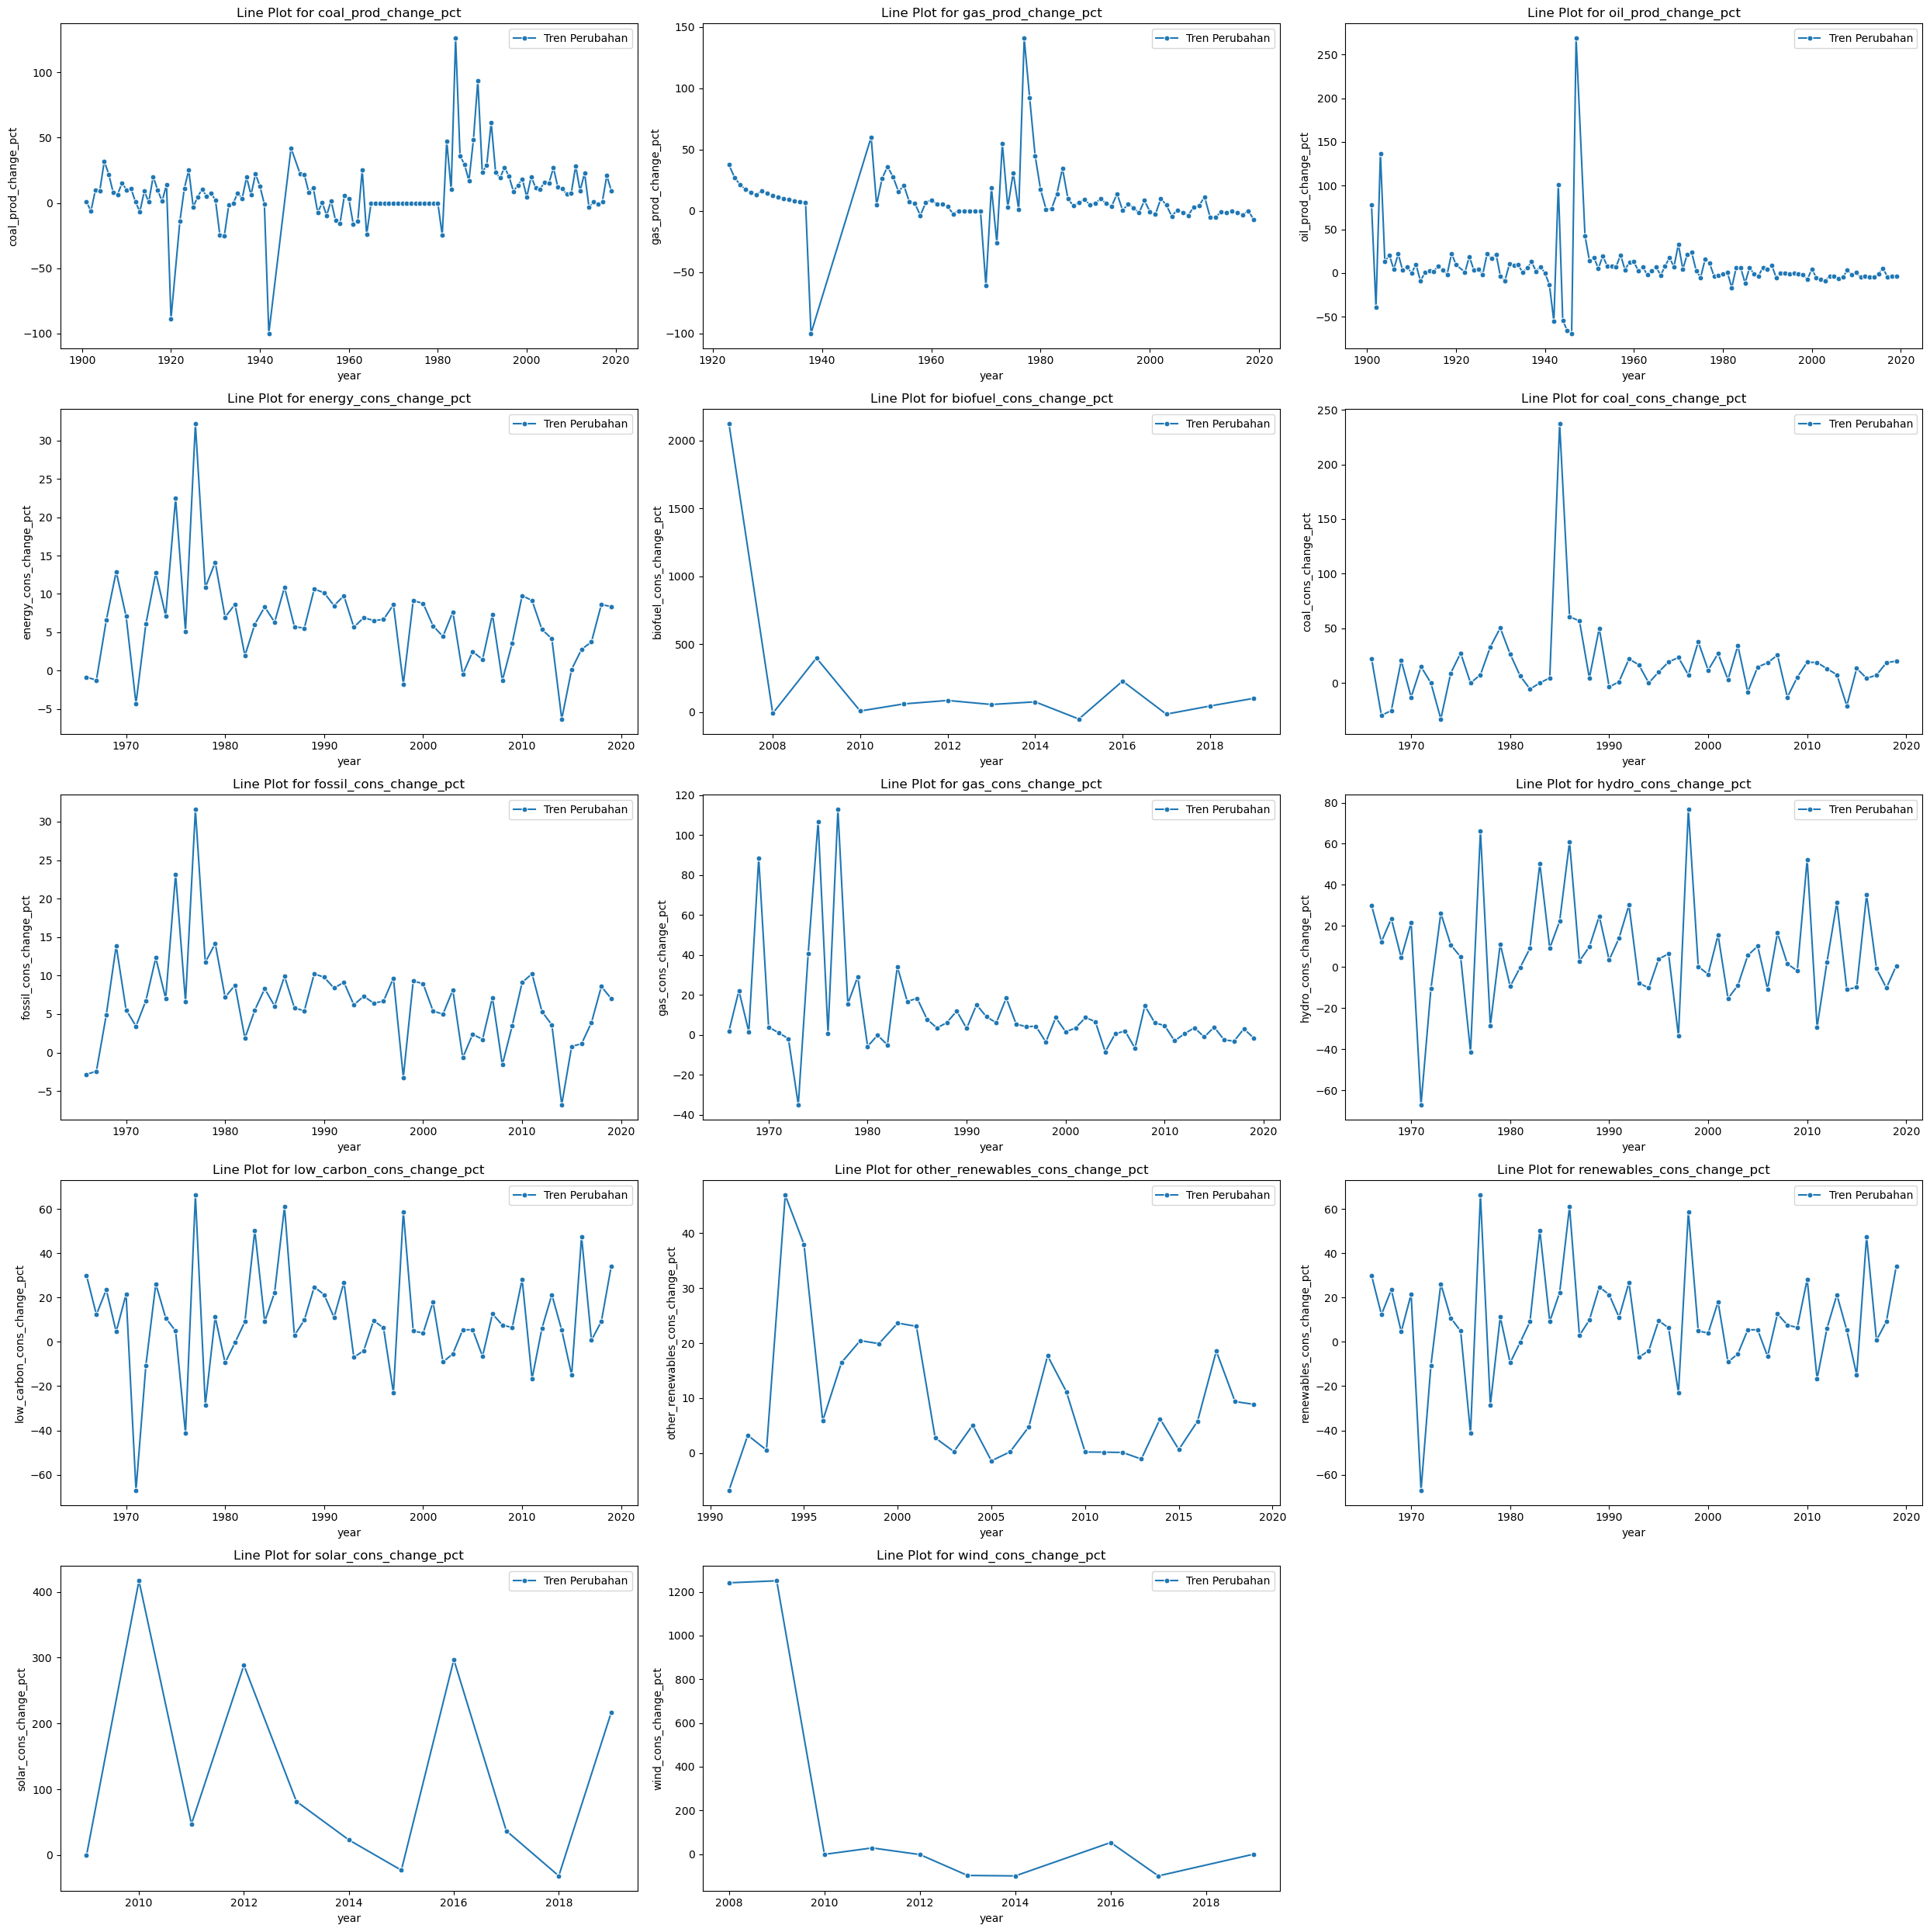

In [129]:
# Subplots
x_column = 'year'
num_cols = len(persentase)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 5 * num_rows))
axs = axs.flatten()

# Plot line plots for each column in persentase
for i, y_col in enumerate(persentase):
    sns.lineplot(x=x_column, y=y_col, data=df_cleaned, marker='o', markersize=5, ax=axs[i], label='Tren Perubahan')
    axs[i].set_title(f'Line Plot for {y_col}')
    axs[i].set_xlabel(x_column)
    axs[i].set_ylabel(f'{y_col}')
    
# Remove unused subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust space between subplots
fig.tight_layout()
plt.savefig('Tren_Persentase_Perubahan.png')
plt.show()

In [97]:
df_cleaned

iso_code    country  year  coal_prod_change_pct  coal_prod_change_twh  \
0        IDN  Indonesia  1900                   NaN                   NaN   
1        IDN  Indonesia  1901                 0.985                 0.016   
2        IDN  Indonesia  1902                -6.341                -0.106   
3        IDN  Indonesia  1903                 9.896                 0.155   
4        IDN  Indonesia  1904                 9.479                 0.163   
..       ...        ...   ...                   ...                   ...   
113      IDN  Indonesia  2015                 0.757                23.776   
114      IDN  Indonesia  2016                -1.163               -36.790   
115      IDN  Indonesia  2017                 1.107                34.611   
116      IDN  Indonesia  2018                20.927               661.494   
117      IDN  Indonesia  2019                 9.363               357.917   

     gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                    NaN                  NaN                  NaN   
1                    NaN                0.000               78.135   
2                    NaN                0.000              -39.350   
3                    NaN                0.000              136.905   
4                    NaN                0.000               12.814   
..                   ...                  ...                  ...   
113               -0.311               -2.374               -0.938   
114               -1.421              -10.822                5.388   
115               -3.163              -23.750               -4.204   
116                0.133                0.967               -3.526   
117               -7.224              -52.593               -3.403   

     oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
0                    NaN                     NaN  ...                    NaN   
1                  2.826                     NaN  ...                    NaN   
2                 -2.535                     NaN  ...                    NaN   
3                  5.350                     NaN  ...                    NaN   
4                  1.186                     NaN  ...                    NaN   
..                   ...                     ...  ...                    ...   
113               -4.460                   0.159  ...                  0.019   
114               25.389                   2.769  ...                  0.080   
115              -20.876                   3.737  ...                  0.110   
116              -16.770                   8.624  ...                  0.340   
117              -15.619                   8.339  ...                  0.362   

     solar_energy_per_capita           gdp  wind_share_elec  \
0                        NaN  4.852760e+10              NaN   
1                        NaN  4.780818e+10              NaN   
2                        NaN  4.679696e+10              NaN   
3                        NaN  4.943822e+10              NaN   
4                        NaN  5.001521e+10              NaN   
..                       ...           ...              ...   
113                    0.052  2.550000e+12            0.002   
114                    0.203  2.680000e+12            0.003   
115                    0.274           NaN            0.002   
116                    0.186           NaN            0.071   
117                    0.582           NaN            0.172   

     wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
0                     NaN                NaN                   NaN   
1                     NaN                NaN                   NaN   
2                     NaN                NaN                   NaN   
3                     NaN                NaN                   NaN   
4                     NaN                NaN                   NaN   
..                    ...                ...                   ...   
113                   NaN     

In [112]:
asal_listrik= ['coal_electricity', 'biofuel_electricity',
              'fossil_electricity', 'gas_electricity',
              'hydro_electricity', 'nuclear_electricity',
              'oil_electricity', 'other_renewable_exc_biofuel_electricity',
              'solar_electricity', 'wind_electricity', 'renewables_electricity',
              'gas_share_energy']

asal_listrik_df = df[asal_listrik]
asal_listrik_df

coal_electricity  biofuel_electricity  fossil_electricity  \
0                 NaN                  NaN                 NaN   
1                 NaN                  NaN                 NaN   
2                 NaN                  NaN                 NaN   
3                 NaN                  NaN                 NaN   
4                 NaN                  NaN                 NaN   
..                ...                  ...                 ...   
115           116.680                1.134             196.509   
116           126.382                1.799             203.755   
117           138.905                0.829             209.252   
118           149.522               13.513             220.262   
119           167.833               11.232             233.472   

     gas_electricity  hydro_electricity  nuclear_electricity  oil_electricity  \
0                NaN                NaN                  NaN              NaN   
1                NaN                NaN                  NaN              NaN   
2                NaN                NaN                  NaN              NaN   
3                NaN                NaN                  NaN              NaN   
4                NaN                NaN                  NaN              NaN   
..               ...                ...                  ...              ...   
115           49.518             13.604                  0.0           30.311   
116           55.394             18.490                  0.0           21.980   
117           52.298             18.446                  0.0           18.048   
118           53.533             21.420                  0.0           17.207   
119           48.926             20.949                  0.0           16.712   

     other_renewable_exc_biofuel_electricity  solar_electricity  \
0                                        NaN                NaN   
1                                        NaN                NaN   
2                                        NaN                NaN   
3                                        NaN                NaN   
4                                        NaN                NaN   
..                                       ...                ...   
115                                   10.050              0.005   
116                                   10.656              0.021   
117                                   12.764              0.029   
118                                   13.920              0.091   
119                                   14.900              0.098   

     wind_electricity  renewables_electricity  gas_share_energy  
0                 NaN                     NaN               NaN  
1                 NaN                     NaN               NaN  
2                 NaN                     NaN               NaN  
3                 NaN                     NaN               NaN  
4                 NaN                     NaN               NaN  
..                ...                     ...               ...  
115             0.004                  24.797            23.191  
116             0.006                  30.972            22.011  
117             0.006                  32.074            20.545  
118             0.190                  49.134            19.489  
119             0.484                  47.663            17.701  

[120 rows x 12 columns]

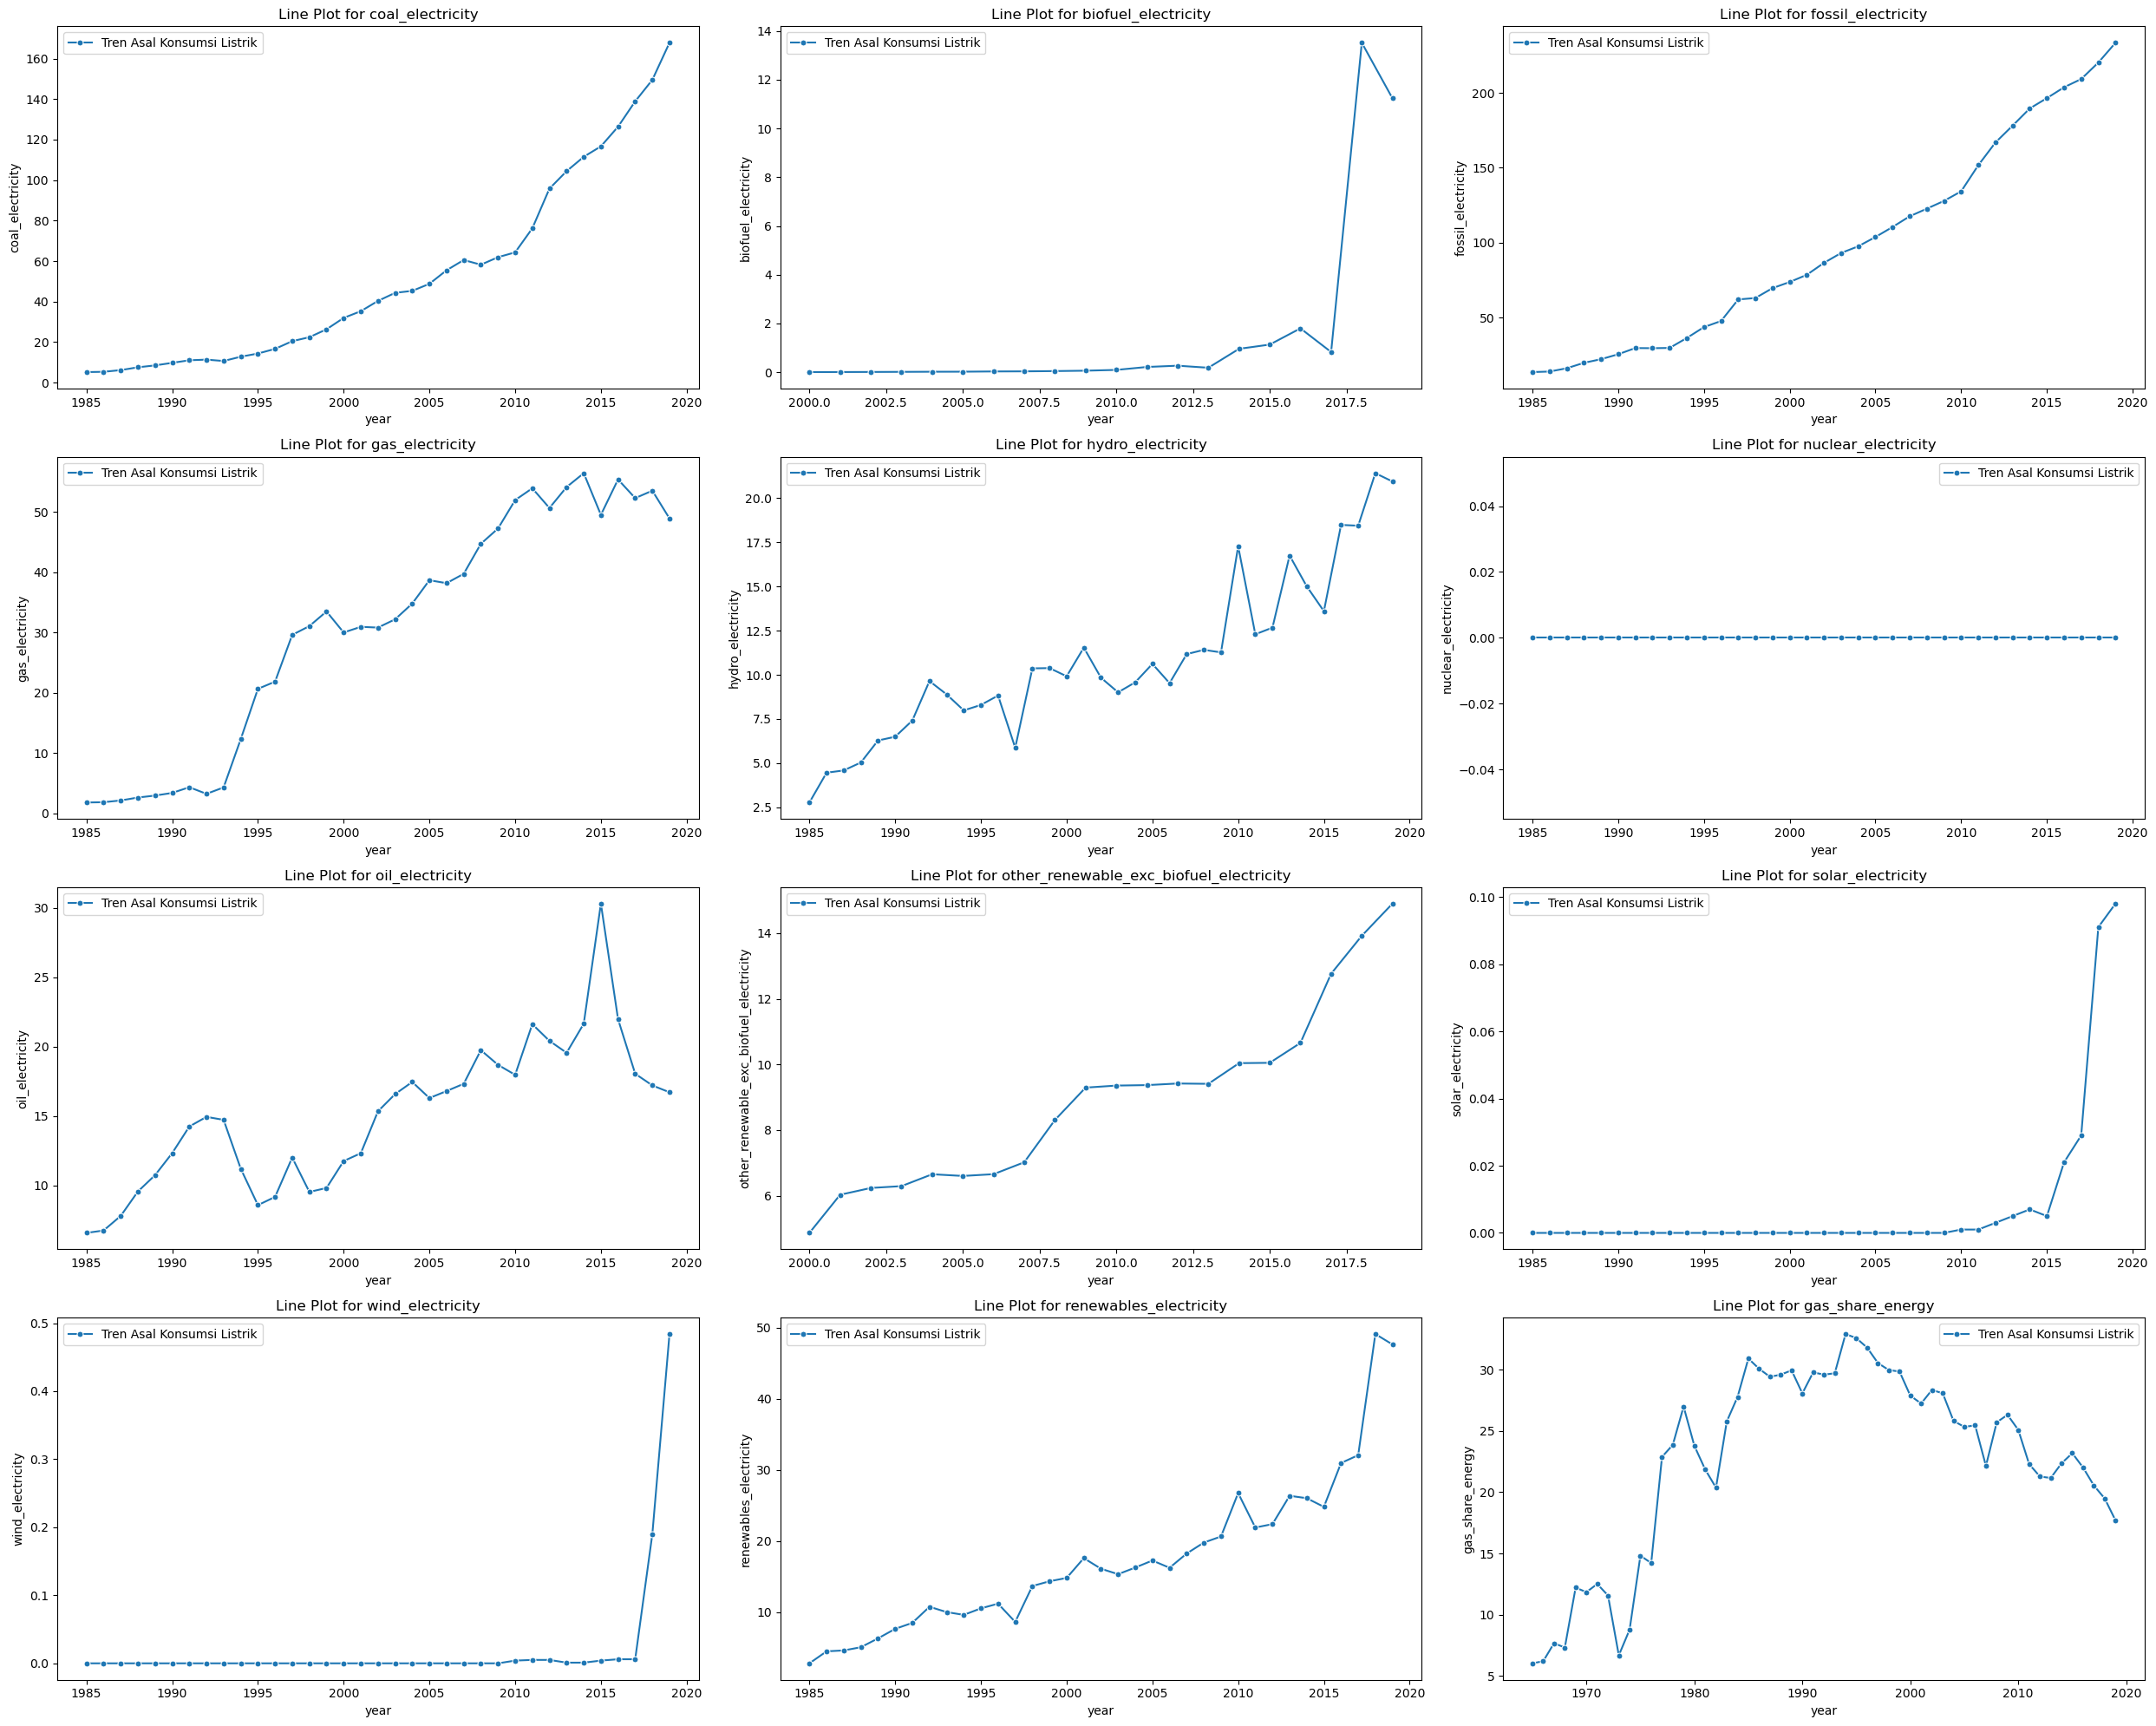

In [130]:
# Subplots
x_column = 'year'
num_cols = len(asal_listrik)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 5 * num_rows))
axs = axs.flatten()

# Plot line plots for each column in persentase
for i, y_col in enumerate(asal_listrik):
    sns.lineplot(x=x_column, y=y_col, data=df_cleaned, marker='o', markersize=5, ax=axs[i], label='Tren Asal Konsumsi Listrik')
    axs[i].set_title(f'Line Plot for {y_col}')
    axs[i].set_xlabel(x_column)
    axs[i].set_ylabel(f'{y_col}')
    
# Remove unused subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust space between subplots
fig.tight_layout()
plt.savefig('Tren_Sumber_Energi_Untuk_Listrik.png')
plt.show()

In [114]:
Produksi = ['coal_production', 'gas_production', 'oil_production']

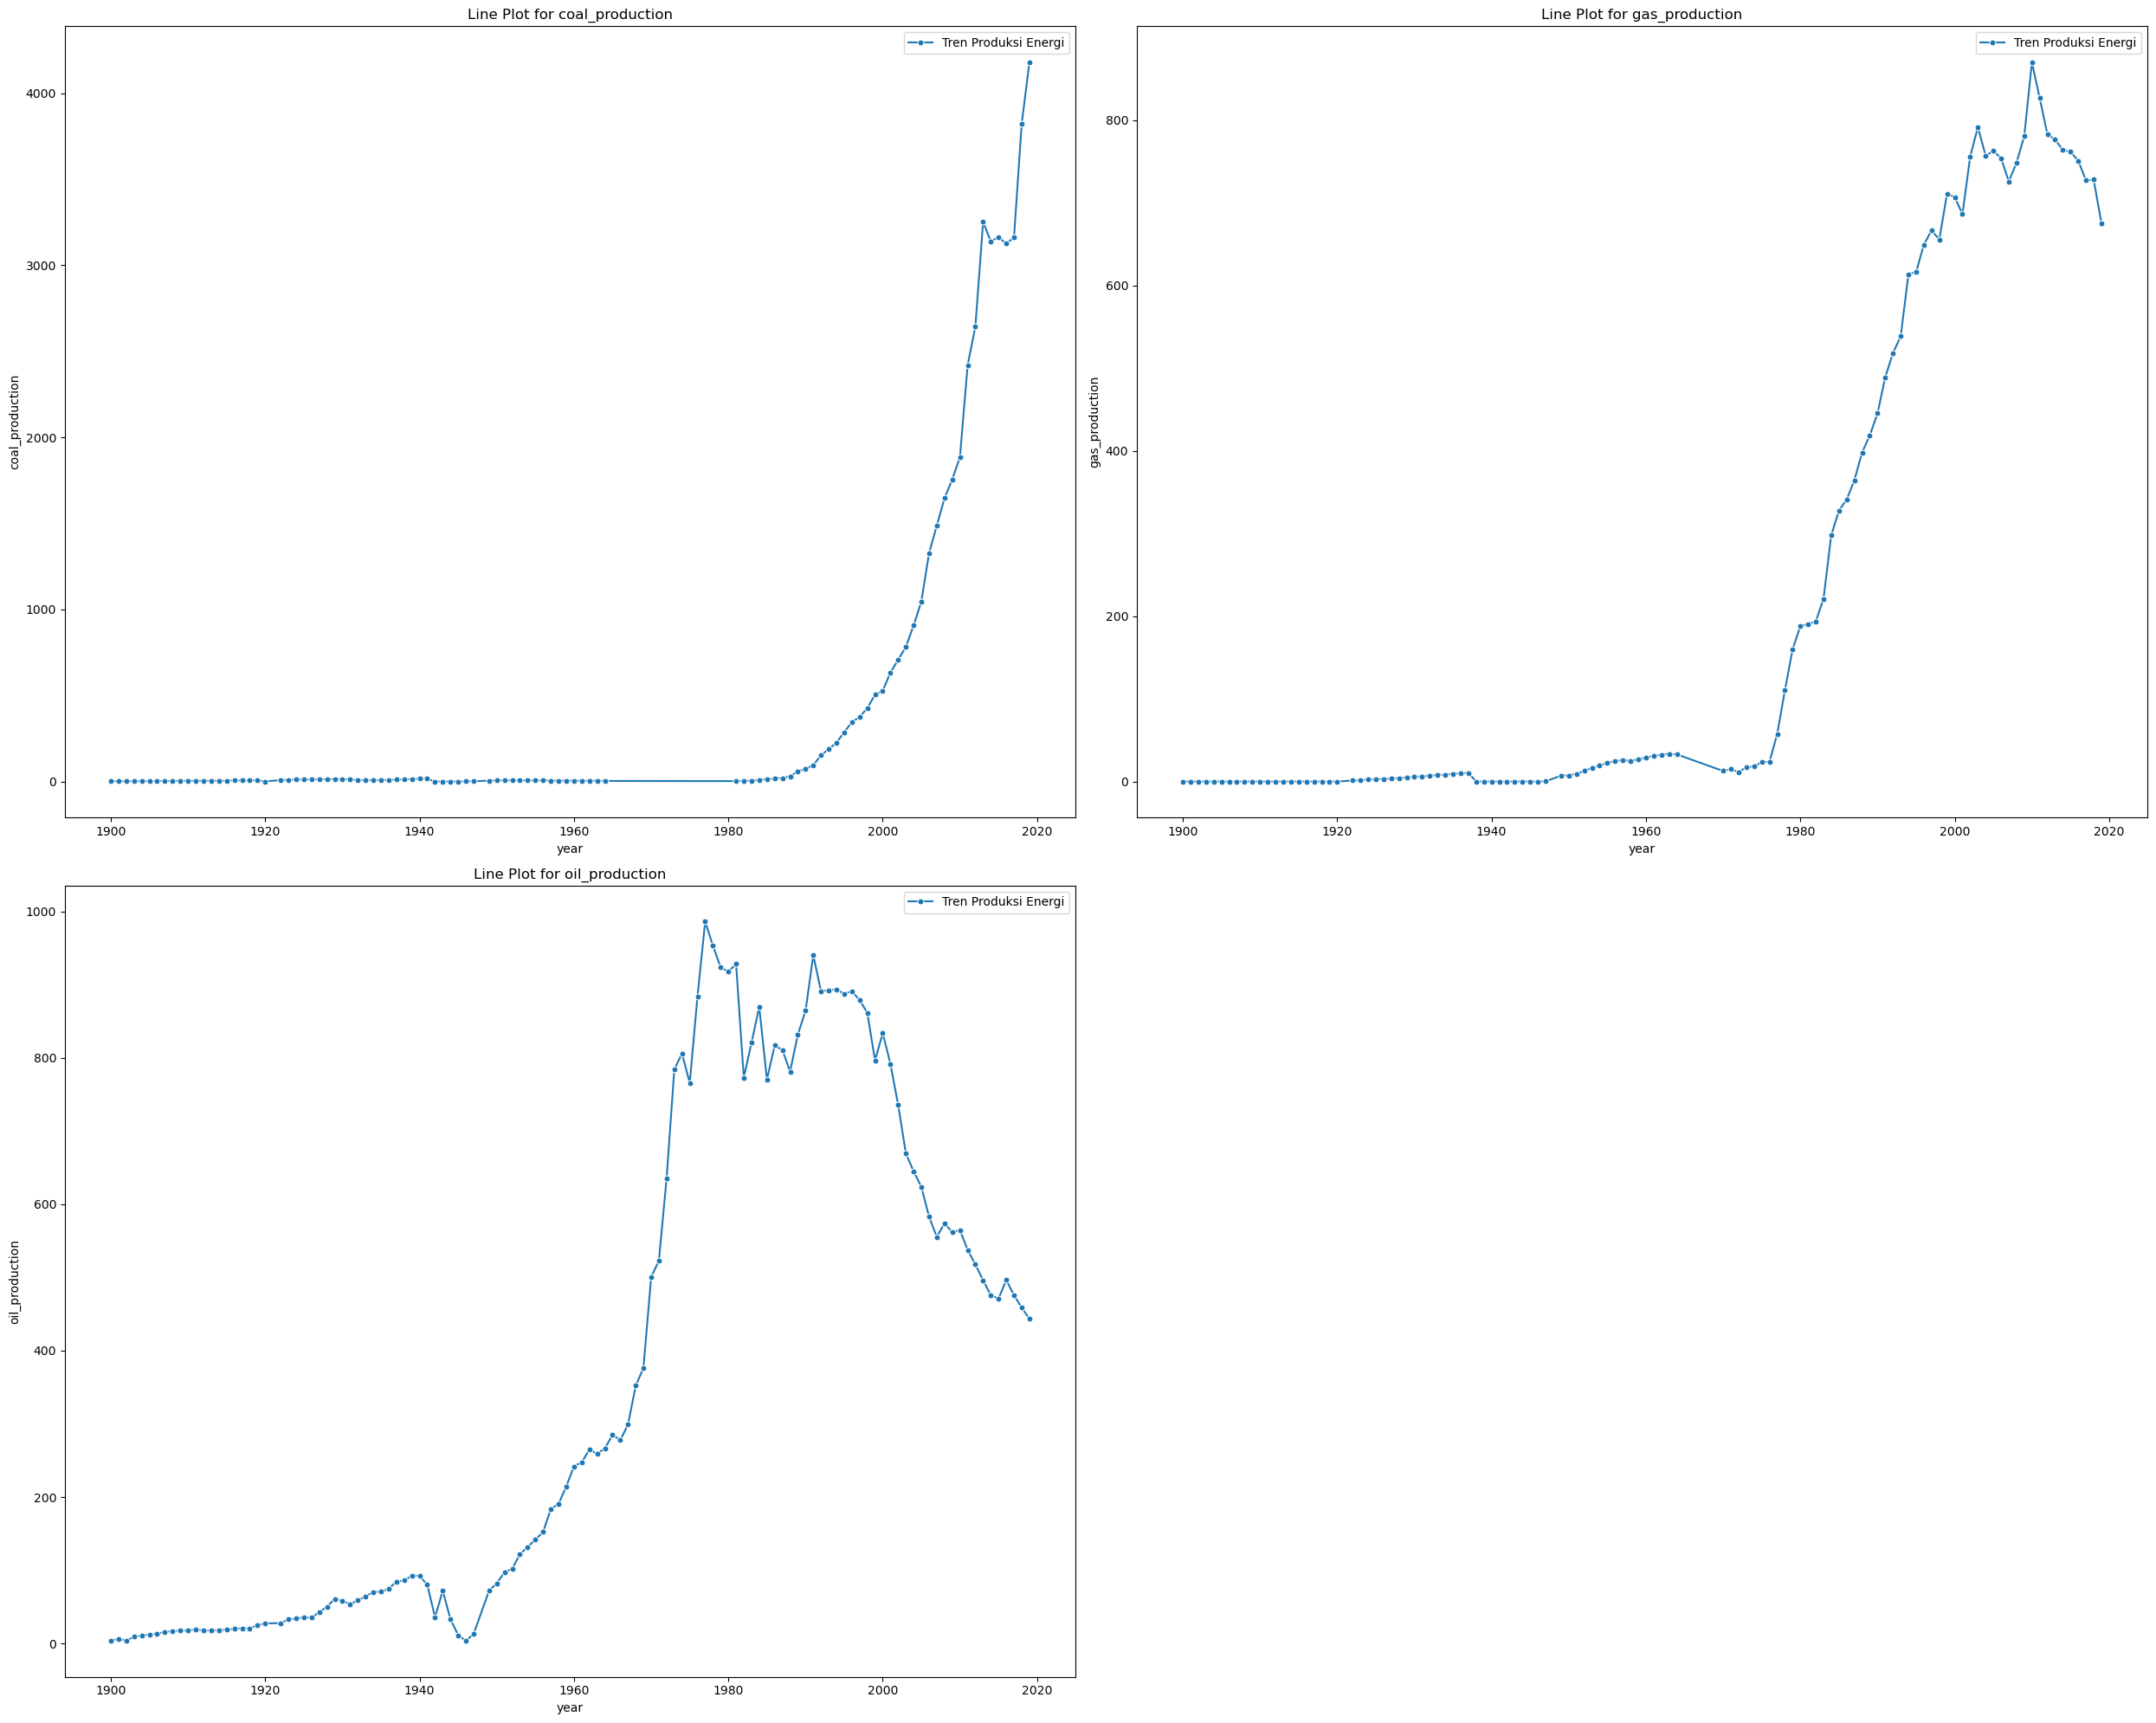

In [131]:
# Subplots
x_column = 'year'
num_cols = len(Produksi)
num_rows = (num_cols + 2) // 2

fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(25, 10 * num_rows))
axs = axs.flatten()

# Plot line plots for each column in persentase
for i, y_col in enumerate(Produksi):
    sns.lineplot(x=x_column, y=y_col, data=df_cleaned, marker='o', markersize=5, ax=axs[i], label='Tren Produksi Energi')
    axs[i].set_title(f'Line Plot for {y_col}')
    axs[i].set_xlabel(x_column)
    axs[i].set_ylabel(f'{y_col}')
    
# Remove unused subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust space between subplots
fig.tight_layout()
plt.savefig('Tren_Produksi_Energi.png')
plt.show()

In [121]:
primary_energy_consumption = ['wind_consumption',  
                             'solar_consumption',
                             'renewables_consumption', 
                              'other_renewable_consumption',
                              'oil_consumption',
                              'nuclear_consumption',
                              'low_carbon_consumption',
                              'hydro_consumption',
                              'gas_consumption',
                              'coal_consumption',
                              'biofuel_consumption',
                             'primary_energy_consumption']

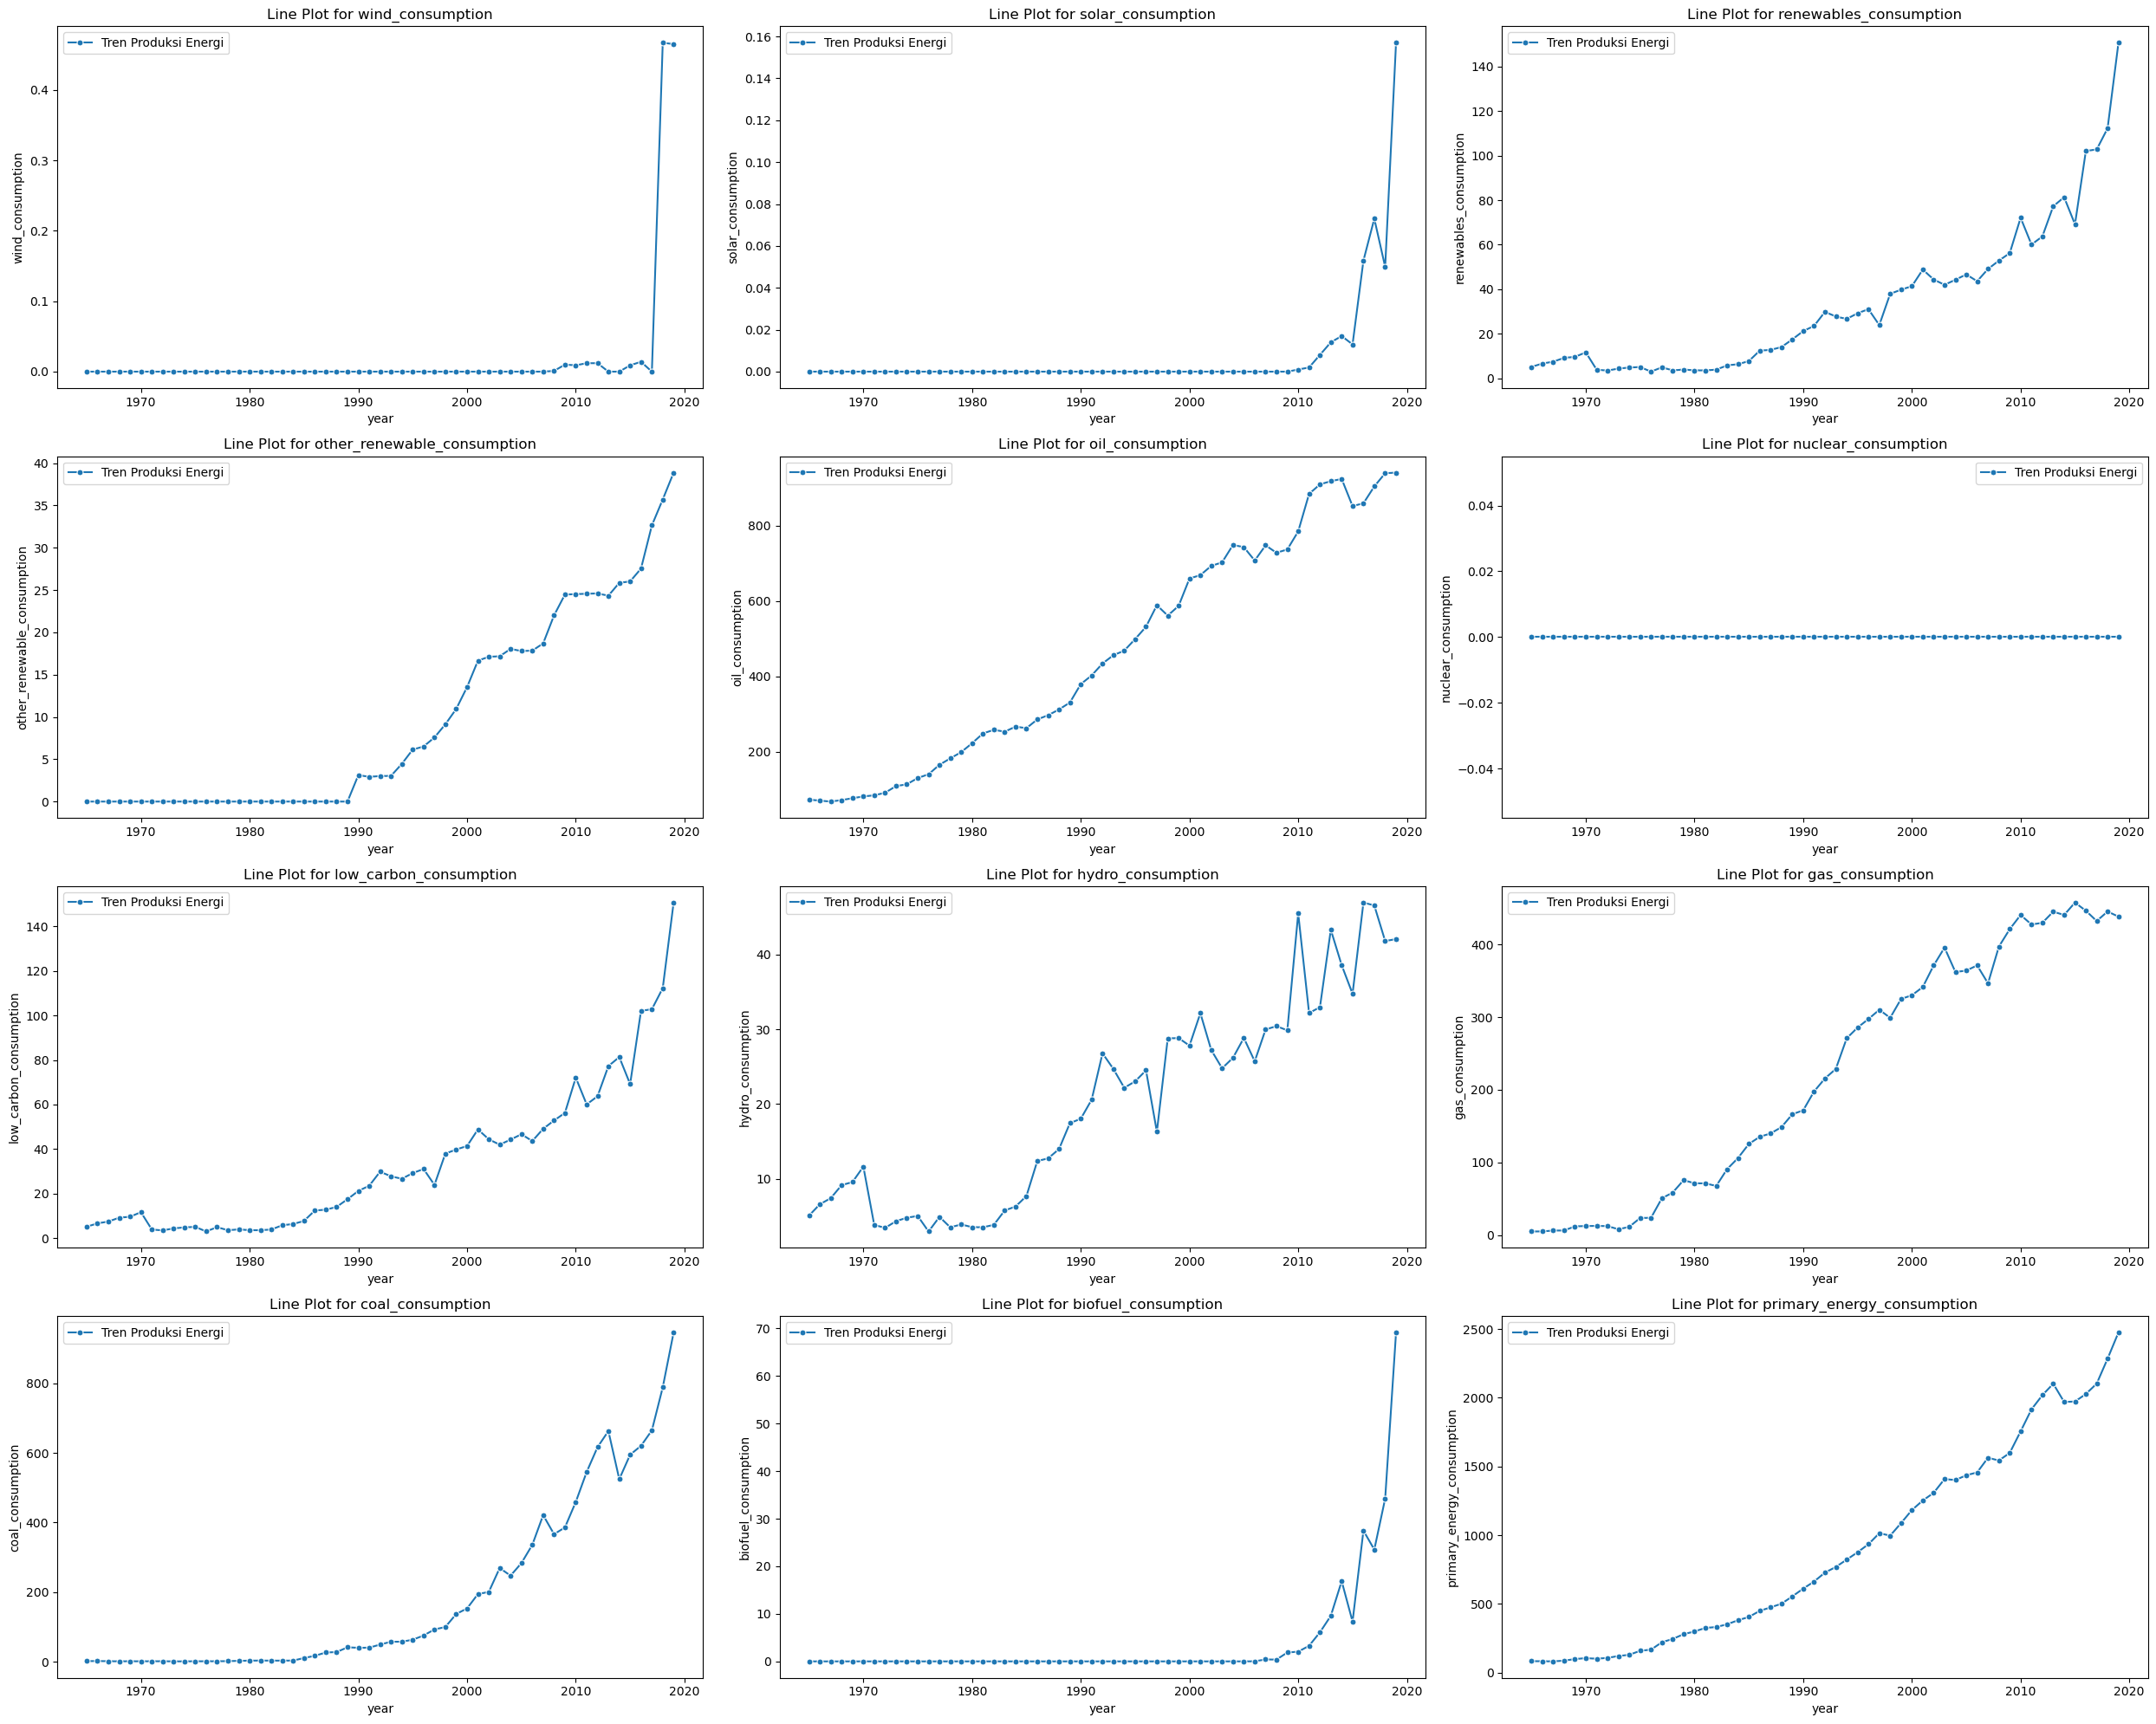

In [132]:
# Subplots
x_column = 'year'
num_cols = len(primary_energy_consumption)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 5 * num_rows))
axs = axs.flatten()

# Plot line plots for each column in persentase
for i, y_col in enumerate(primary_energy_consumption):
    sns.lineplot(x=x_column, y=y_col, data=df_cleaned, marker='o', markersize=5, ax=axs[i], label='Tren Produksi Energi')
    axs[i].set_title(f'Line Plot for {y_col}')
    axs[i].set_xlabel(x_column)
    axs[i].set_ylabel(f'{y_col}')
    
# Remove unused subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust space between subplots
fig.tight_layout()
plt.savefig('Tren_primary_energy_consumption.png')
plt.show()

In [127]:
per_capita = ['wind_energy_per_capita', 'solar_energy_per_capita',
             'renewables_elec_per_capita', 'other_renewables_energy_per_capita',
             'oil_energy_per_capita', 'nuclear_energy_per_capita', 'low_carbon_energy_per_capita',
             'hydro_energy_per_capita', 'gas_energy_per_capita', 
             'energy_per_capita', 'coal_cons_per_capita', 'biofuel_cons_per_capita']

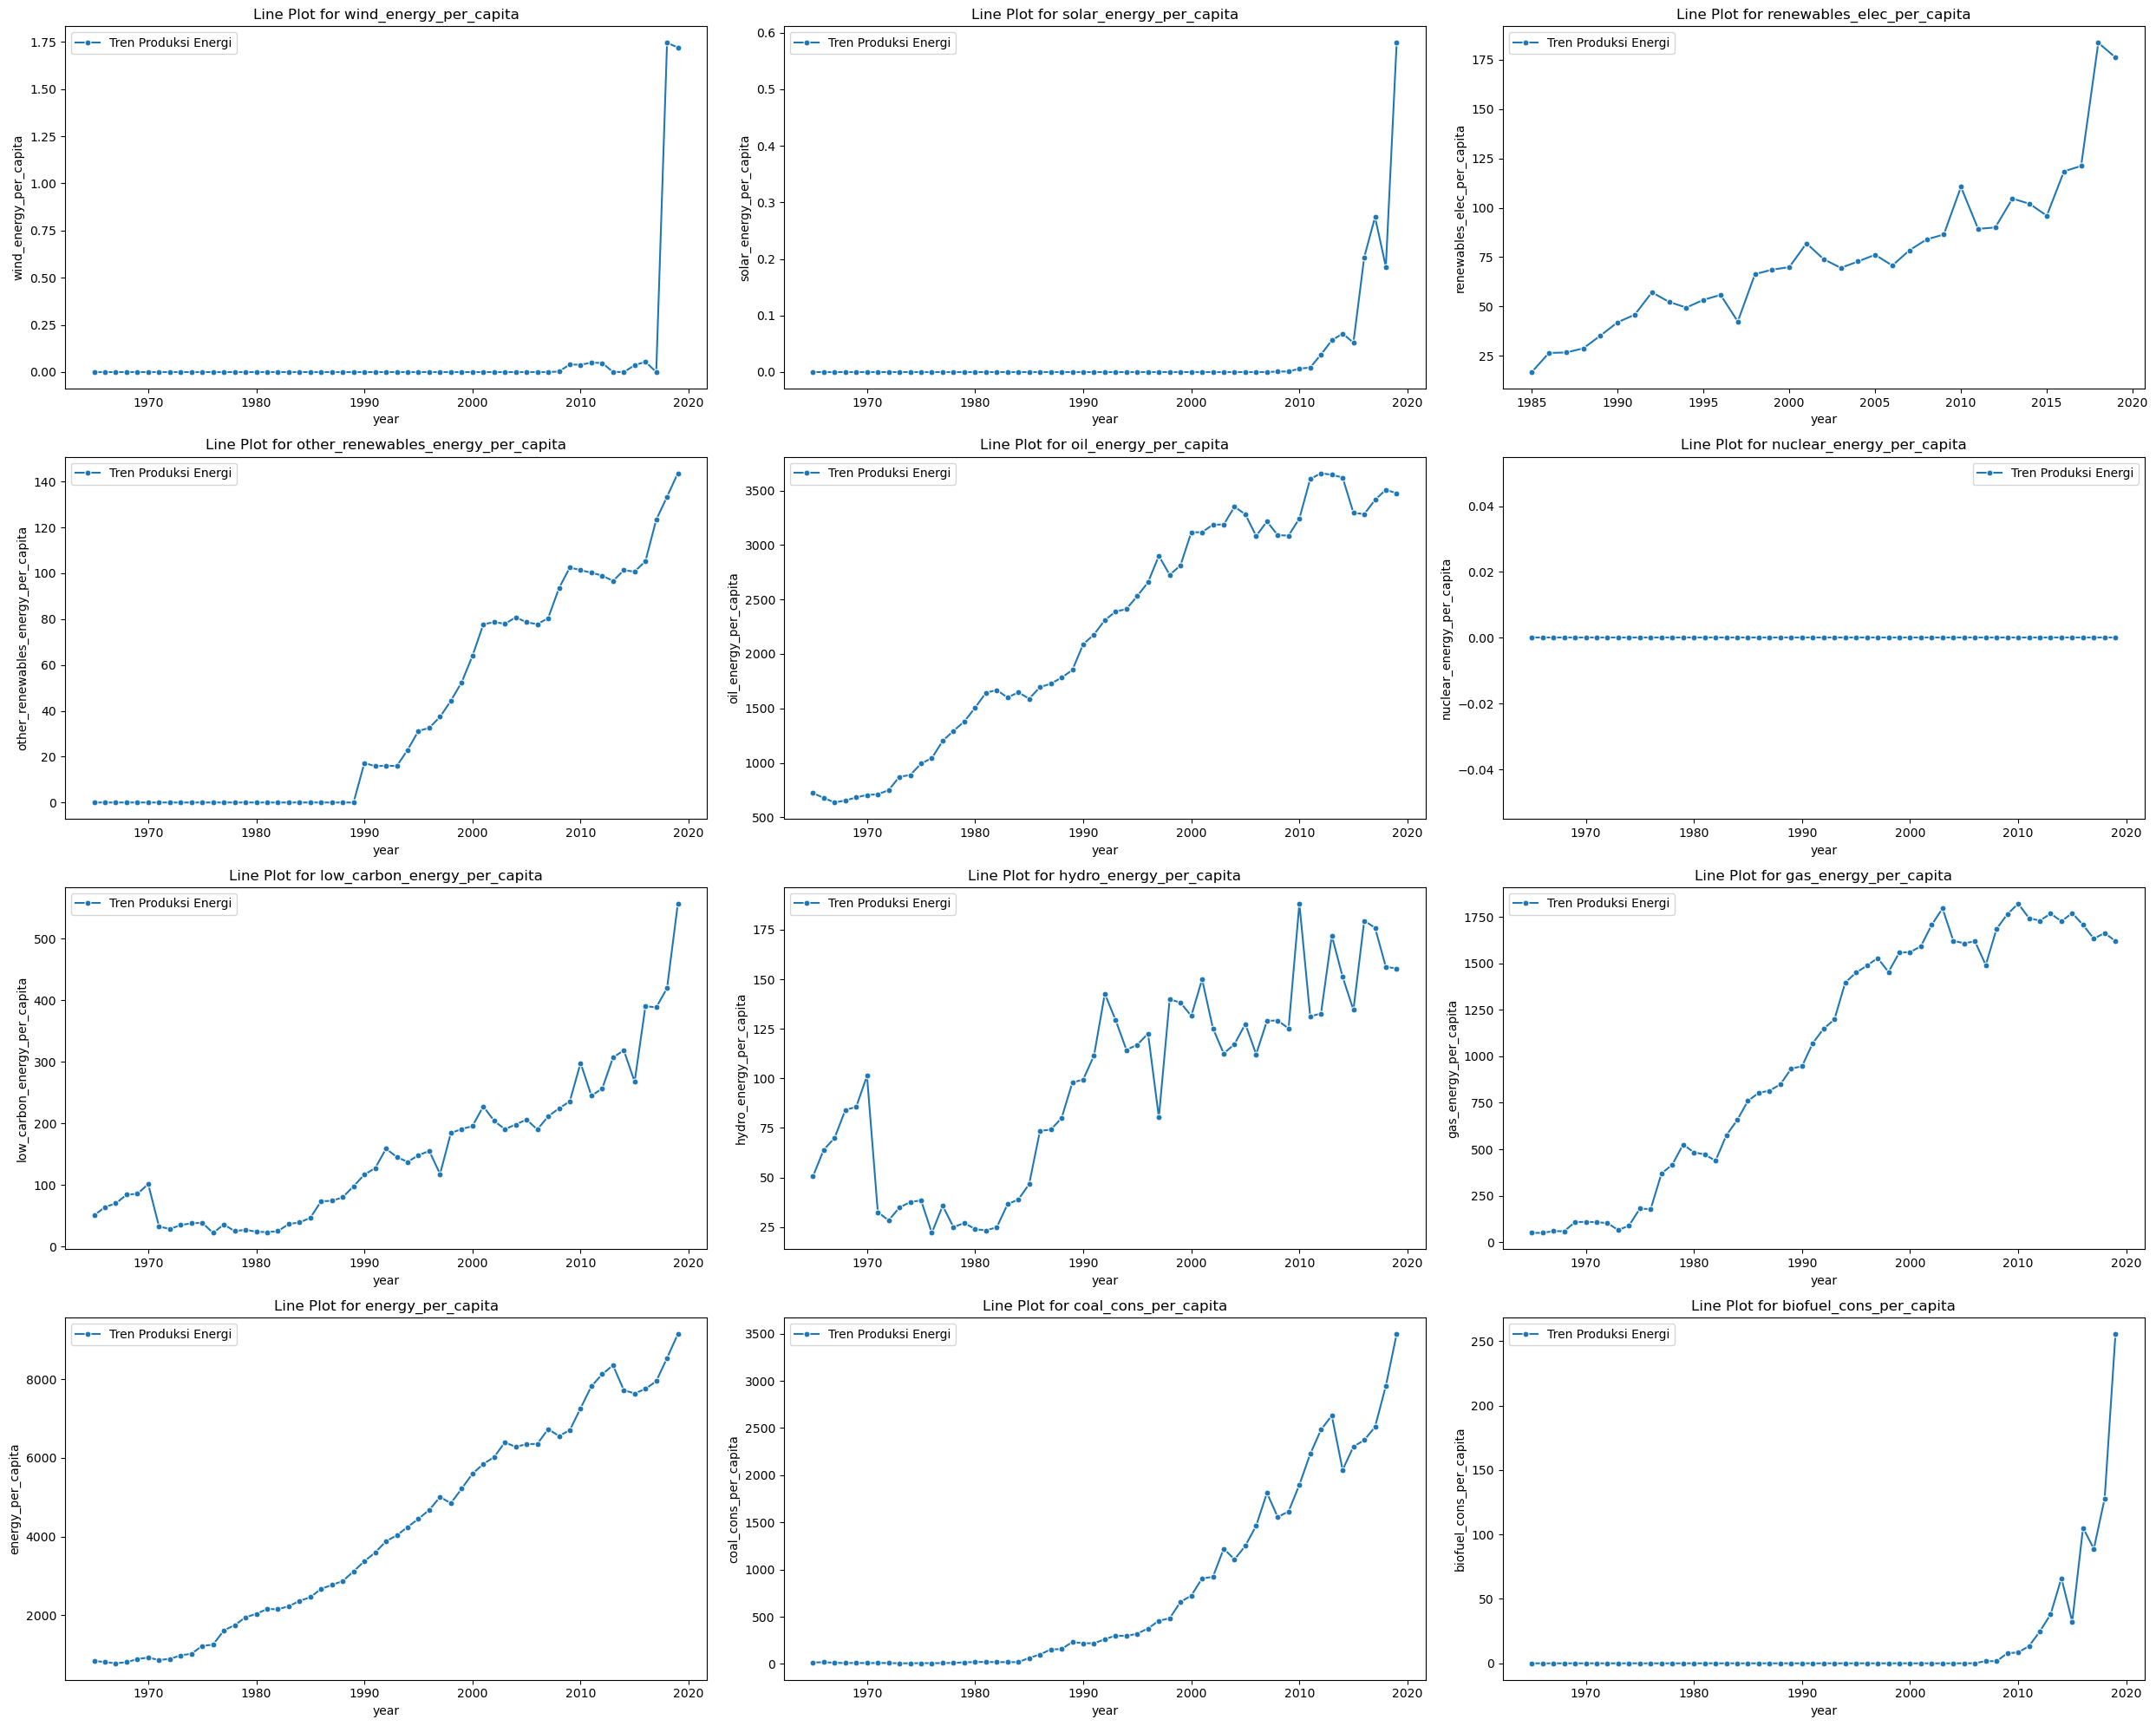

In [133]:
# Subplots
x_column = 'year'
num_cols = len(per_capita)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 5 * num_rows))
axs = axs.flatten()

# Plot line plots for each column in persentase
for i, y_col in enumerate(per_capita):
    sns.lineplot(x=x_column, y=y_col, data=df_cleaned, marker='o', markersize=5, ax=axs[i], label='Tren Produksi Energi')
    axs[i].set_title(f'Line Plot for {y_col}')
    axs[i].set_xlabel(x_column)
    axs[i].set_ylabel(f'{y_col}')
    
# Remove unused subplots
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust space between subplots
fig.tight_layout()
plt.savefig('Tren_Percapita_primary_energy .png')
plt.show()